In [2]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [3]:
dataset = ImageFolder(root="data/trafic_32", transform=ToTensor())

In [4]:
from collections import Counter

class_counts = Counter(dataset.targets)

for class_idx, count in class_counts.items():
    class_name = dataset.classes[class_idx]
    print(f"Klasa: {class_name}, Liczebność: {count}")

Klasa: 00000, Liczebność: 210
Klasa: 00001, Liczebność: 2220
Klasa: 00002, Liczebność: 2250
Klasa: 00003, Liczebność: 1410
Klasa: 00004, Liczebność: 1980
Klasa: 00005, Liczebność: 1860
Klasa: 00006, Liczebność: 420
Klasa: 00007, Liczebność: 1440
Klasa: 00008, Liczebność: 1410
Klasa: 00009, Liczebność: 1470
Klasa: 00010, Liczebność: 2010
Klasa: 00011, Liczebność: 1320
Klasa: 00012, Liczebność: 2100
Klasa: 00013, Liczebność: 2160
Klasa: 00014, Liczebność: 780
Klasa: 00015, Liczebność: 630
Klasa: 00016, Liczebność: 420
Klasa: 00017, Liczebność: 1110
Klasa: 00018, Liczebność: 1200
Klasa: 00019, Liczebność: 210
Klasa: 00020, Liczebność: 360
Klasa: 00021, Liczebność: 330
Klasa: 00022, Liczebność: 390
Klasa: 00023, Liczebność: 510
Klasa: 00024, Liczebność: 270
Klasa: 00025, Liczebność: 1500
Klasa: 00026, Liczebność: 600
Klasa: 00027, Liczebność: 240
Klasa: 00028, Liczebność: 540
Klasa: 00029, Liczebność: 270
Klasa: 00030, Liczebność: 450
Klasa: 00031, Liczebność: 780
Klasa: 00032, Liczebność:

In [5]:
from torch.utils.data import DataLoader
import torch


dataloader = DataLoader(dataset, batch_size=64, shuffle=False)

mean = torch.zeros(3)
std = torch.zeros(3)
n_samples = 0

for images, _ in dataloader:
    n_samples += images.size(0)
    mean += images.mean(dim=[0, 2, 3]) * images.size(0)
    std += images.std(dim=[0, 2, 3]) * images.size(0)

mean /= n_samples
std /= n_samples

print(f"Średnia: {mean}")
print(f"Odchylenie standardowe: {std}")

Średnia: tensor([0.3185, 0.2930, 0.3016])
Odchylenie standardowe: tensor([0.2266, 0.2214, 0.2268])


In [6]:
print(images.min(), images.max())

tensor(0.) tensor(0.6000)


In [24]:
val_size = 0.2
val_length = 1000
train_length = len(dataset) - val_length  # Pozostała liczba próbek

train_dataset, val_dataset = torch.utils.data.random_split(
    dataset,
    [train_length, val_length],
)

Różnice w procentowym udziale klas:
Klasa: 38, Różnica: 0.33%
Klasa: 1, Różnica: 0.86%
Klasa: 5, Różnica: 0.78%
Klasa: 13, Różnica: -0.73%
Klasa: 2, Różnica: -0.55%
Klasa: 28, Różnica: -0.39%
Klasa: 3, Różnica: 0.00%
Klasa: 9, Różnica: -0.15%
Klasa: 10, Różnica: 1.00%
Klasa: 20, Różnica: 0.19%
Klasa: 40, Różnica: -0.33%
Klasa: 8, Różnica: 0.31%
Klasa: 26, Różnica: -0.24%
Klasa: 4, Różnica: 0.26%
Klasa: 41, Różnica: 0.30%
Klasa: 15, Różnica: -0.62%
Klasa: 18, Różnica: 0.04%
Klasa: 12, Różnica: 0.15%
Klasa: 17, Różnica: 0.28%
Klasa: 33, Różnica: 0.25%
Klasa: 25, Różnica: -1.26%
Klasa: 32, Różnica: 0.40%
Klasa: 6, Różnica: 0.03%
Klasa: 19, Różnica: 0.17%
Klasa: 42, Różnica: 0.19%
Klasa: 11, Różnica: -0.38%
Klasa: 34, Różnica: 0.23%
Klasa: 14, Różnica: 0.73%
Klasa: 24, Różnica: 0.01%
Klasa: 36, Różnica: -0.40%
Klasa: 16, Różnica: -0.38%
Klasa: 35, Różnica: -0.78%
Klasa: 22, Różnica: -0.20%
Klasa: 23, Różnica: -0.10%
Klasa: 7, Różnica: 0.13%
Klasa: 30, Różnica: -0.15%
Klasa: 21, Różnica: 0.

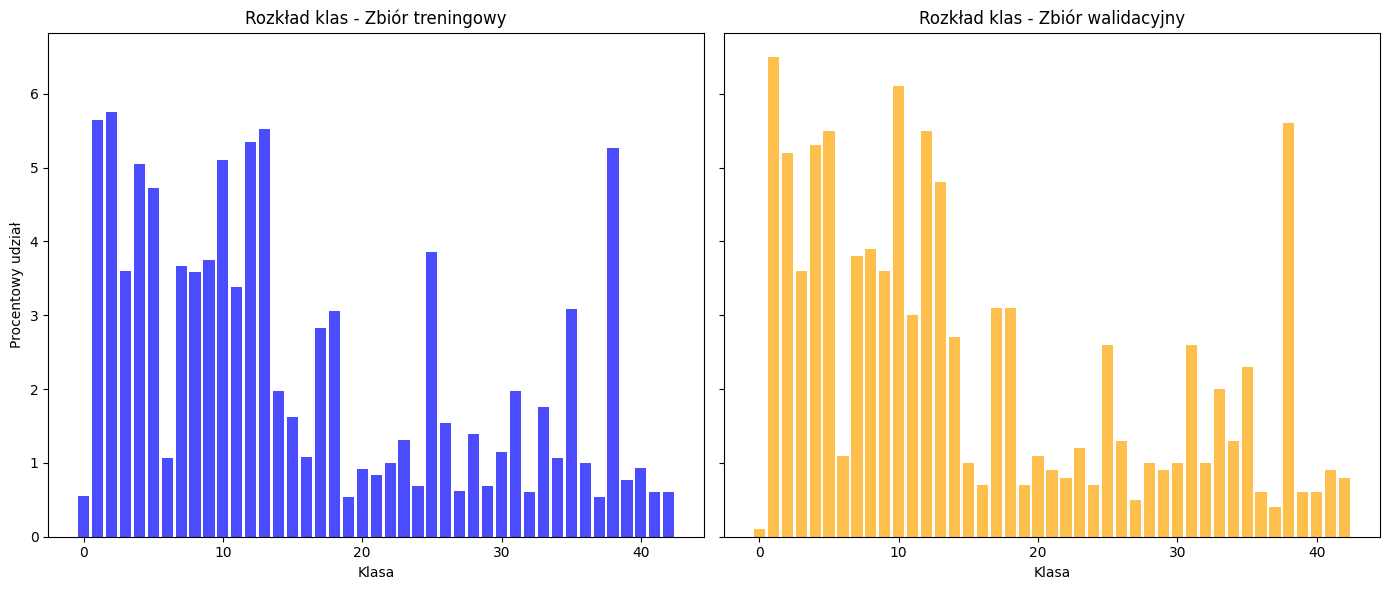

In [25]:
import matplotlib.pyplot as plt
from collections import Counter

# Liczebność klas w zbiorze treningowym i walidacyjnym
original_targets = dataset.targets  # Etykiety klas z ImageFolder

# Pobranie indeksów dla zbiorów treningowego i walidacyjnego
train_indices = train_dataset.indices
val_indices = val_dataset.indices

# Liczebność klas w zbiorze treningowym
train_targets = [original_targets[i] for i in train_indices]
class_counts_train = Counter(train_targets)

# Liczebność klas w zbiorze walidacyjnym
val_targets = [original_targets[i] for i in val_indices]
class_counts_val = Counter(val_targets)

# Obliczenie całkowitej liczby próbek w obu zbiorach
total_train = sum(class_counts_train.values())
total_val = sum(class_counts_val.values())

# Obliczenie procentowego udziału klas
percent_train = {
    cls: (count / total_train) * 100 for cls, count in class_counts_train.items()
}
percent_val = {
    cls: (count / total_val) * 100 for cls, count in class_counts_val.items()
}

# Obliczenie różnic w procentowym udziale klas
differences = {}
for class_idx in percent_train.keys():
    train_percent = percent_train[class_idx]
    val_percent = percent_val.get(
        class_idx, 0
    )  # Jeśli klasa nie istnieje w walidacyjnym, ustaw 0
    difference = val_percent - train_percent  # Różnica w procentowym udziale
    differences[class_idx] = difference

# Wyświetlenie różnic w procentowym udziale klas
print("Różnice w procentowym udziale klas:")
for class_idx, diff in differences.items():
    print(f"Klasa: {class_idx}, Różnica: {diff:.2f}%")

# Rysowanie histogramów
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Histogram dla zbioru treningowego
ax[0].bar(percent_train.keys(), percent_train.values(), color="blue", alpha=0.7)
ax[0].set_title("Rozkład klas - Zbiór treningowy")
ax[0].set_xlabel("Klasa")
ax[0].set_ylabel("Procentowy udział")

# Histogram dla zbioru walidacyjnego
ax[1].bar(percent_val.keys(), percent_val.values(), color="orange", alpha=0.7)
ax[1].set_title("Rozkład klas - Zbiór walidacyjny")
ax[1].set_xlabel("Klasa")

plt.tight_layout()
plt.show()

In [18]:
len(dataset)

39209